# Generalized gaussian versus gaussian when there is no skew

In [15]:
library(brms)
library(tidyverse)
library(broom)

In [32]:
# sim data
a <- 2
b <- 2
b2 <- 3
b_b2 <- 2
treatment_a <- c(rep(0, 50), rep(1, 50))
treatment_b <- c(rep(0, 25), rep(1, 25), rep(0, 25), rep(1, 25))
y <- rnorm(
    mean = a + b*treatment_a + b2*treatment_b + b_b2*treatment_a*treatment_b,
    sd = 2, n = 100)

df <- tibble(treatment_a = treatment_a, treatment_b = treatment_b, y = y)

In [33]:
fit <- brm(y ~ 1 + treatment_a*treatment_b, data = df)

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL 'e66a7d4dacb9d9402f7a8b6dd6fb40f7' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.36 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.095144 seconds (Warm-up)
Chain 1:                0.072201 seconds (Sampling)


In [34]:
fit_g <- brm(y ~ 1 + treatment_a*treatment_b, family = skew_normal(), data = df)

Compiling the C++ model
recompiling to avoid crashing R session
Start sampling



SAMPLING FOR MODEL '7950c448ccefa79e7a3776922fb71191' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.61 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.29979 seconds (Warm-up)
Chain 1:                0.219405 seconds (Sampling)
C

In [35]:
summary(fit)
summary(fit_g)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ 1 + treatment_a * treatment_b 
   Data: df (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
                        Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept                   2.37      0.41     1.55     3.16       2318 1.00
treatment_a                 1.90      0.60     0.76     3.08       2085 1.00
treatment_b                 2.92      0.58     1.77     4.03       2246 1.00
treatment_a:treatment_b     1.93      0.84     0.30     3.57       2027 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma     2.10      0.15     1.83     2.42       3333 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chai

 Family: skew_normal 
  Links: mu = identity; sigma = identity; alpha = identity 
Formula: y ~ 1 + treatment_a * treatment_b 
   Data: df (Number of observations: 100) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
                        Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
Intercept                   2.37      0.42     1.57     3.19       2574 1.00
treatment_a                 1.91      0.61     0.70     3.07       2187 1.00
treatment_b                 2.90      0.60     1.71     4.06       2371 1.00
treatment_a:treatment_b     1.96      0.84     0.30     3.60       1784 1.00

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sigma     2.11      0.16     1.84     2.45       3640 1.00
alpha     0.40      1.07    -1.52     2.34       2941 1.00

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effect

In [36]:
tidy(fit)
tidy(fit_g)

term,estimate,std.error,lower,upper
b_Intercept,2.365309,0.4103134,1.6943324,3.037853
b_treatment_a,1.900002,0.5963468,0.9182754,2.889015
b_treatment_b,2.916170,0.5777463,1.9645749,3.853358
b_treatment_a:treatment_b,1.926150,0.8362831,0.5534887,3.314504
sigma,2.099973,0.1528552,1.8652092,2.372590
lp__,-220.269220,1.6115723,-223.3638900,-218.291702


term,estimate,std.error,lower,upper
b_Intercept,2.368372,0.4159775,1.6929437,3.058047
b_treatment_a,1.906806,0.6051003,0.8992847,2.888506
b_treatment_b,2.898493,0.5964351,1.9002172,3.879458
b_treatment_a:treatment_b,1.959147,0.8400708,0.5650679,3.353046
sigma,2.114376,0.1561377,1.8792641,2.383833
alpha,0.404266,1.0697914,-1.3036374,2.101409
lp__,-222.819619,1.7089899,-225.9836236,-220.697496


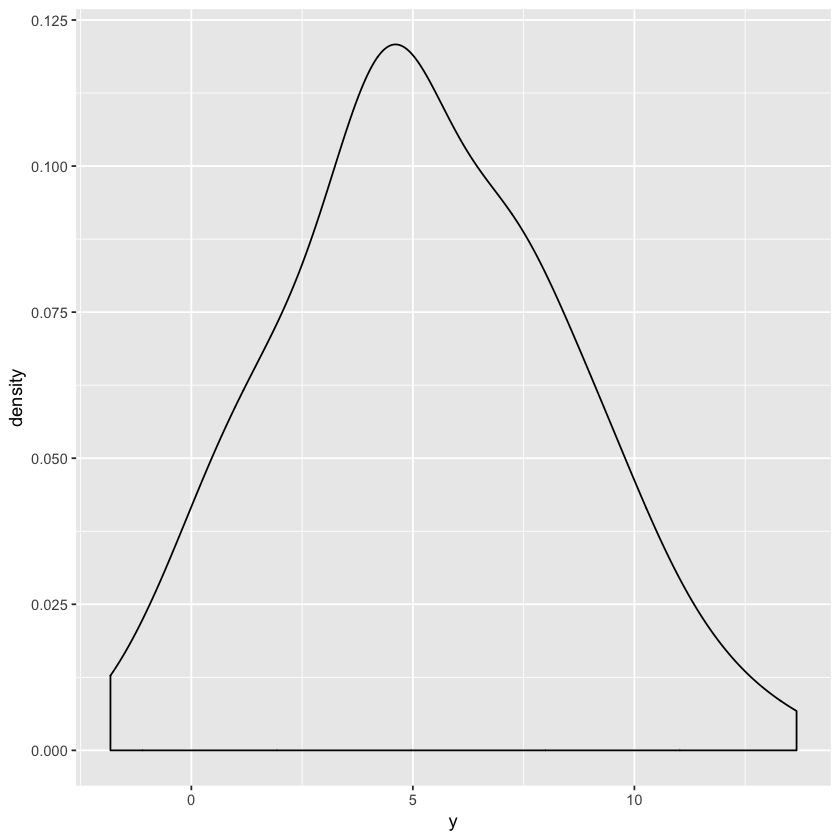

In [37]:
ggplot(df, aes(y)) +
    geom_density()